# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
!unzip /content/kddcup.data_10_percent.gz.zip


Archive:  /content/kddcup.data_10_percent.gz.zip
  inflating: kddcup.data_10_percent.gz  


In [3]:
path = "/content/kddcup.data_10_percent.gz"


# Prepocessing the data as taken dataset is subset

In [4]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [5]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [6]:
df = pd.read_csv(path,names=columns)
#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [7]:
df['Attack Type'].value_counts()

Attack Type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

# EDA

In [12]:
import matplotlib.pyplot as plt

# Function to create and save bar graphs
def bar_graph(feature, filename):
    plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
    df[feature].value_counts().plot(kind="bar")
    plt.title(f"Bar graph of {feature}")
    plt.savefig(f"/content/{filename}.png")  # Save the plot as a .png file
    plt.show()




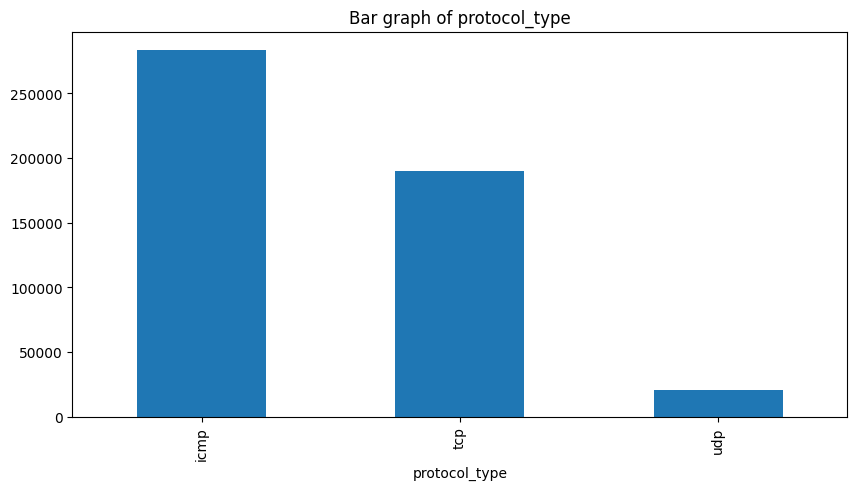

In [13]:
# Create and save bar graphs for the specified features
bar_graph('protocol_type', 'protocol_type')



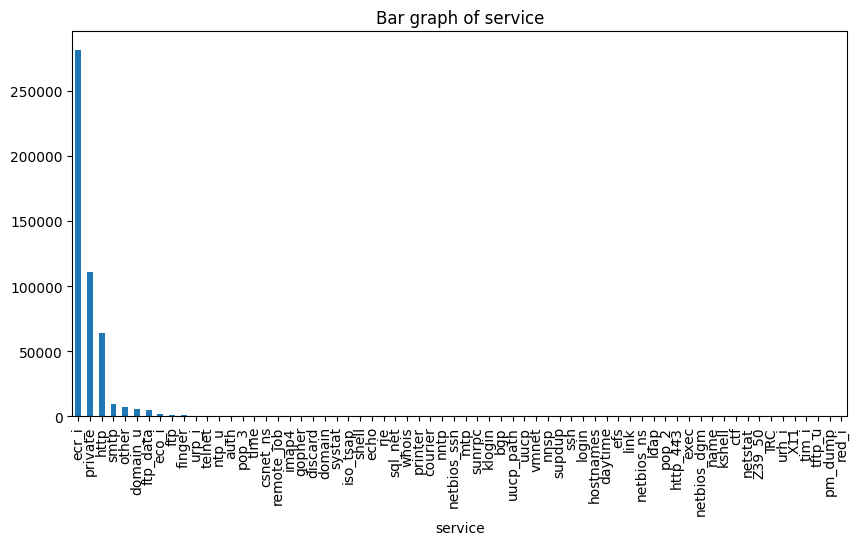

In [14]:
bar_graph('service', 'service')



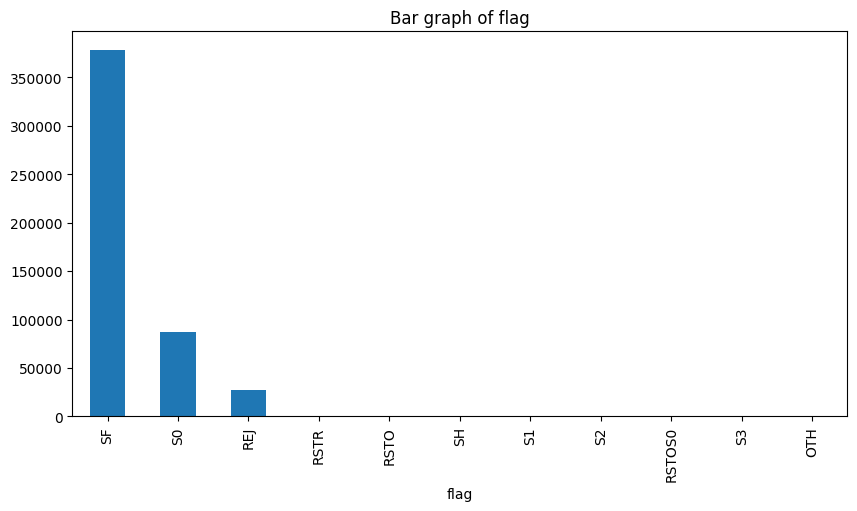

In [15]:
bar_graph('flag', 'flag')



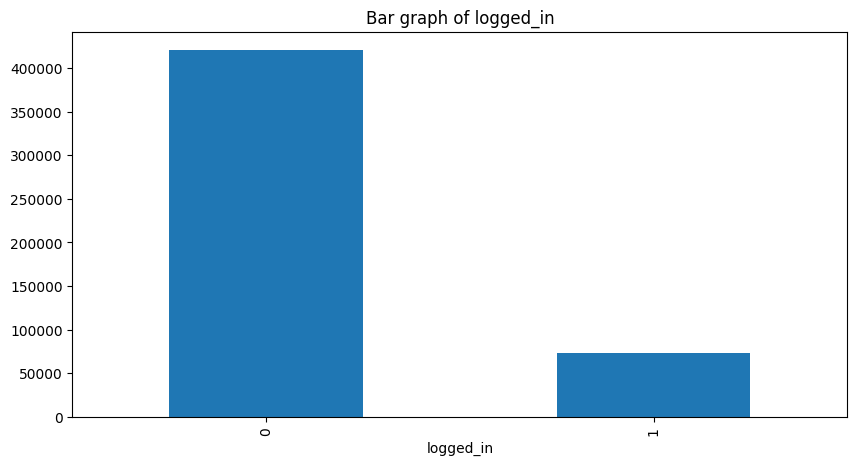

In [16]:
bar_graph('logged_in', 'logged_in')



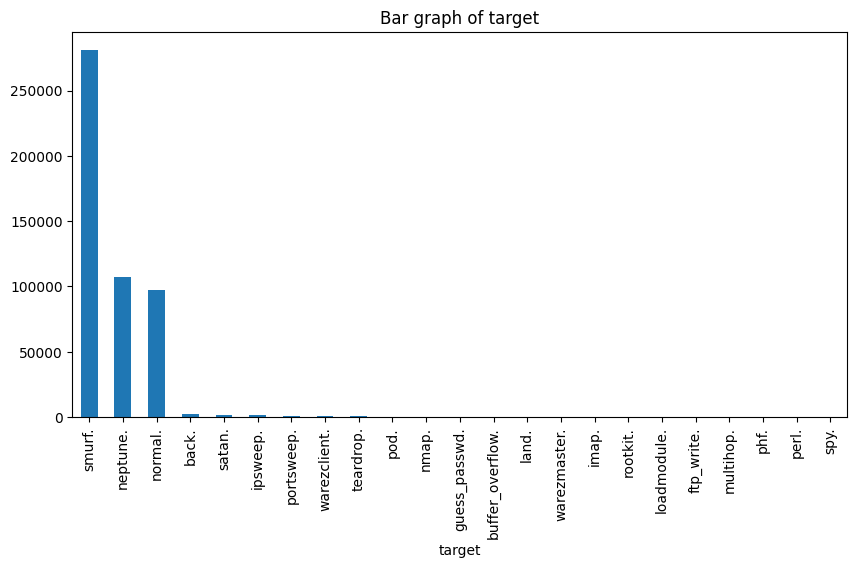

In [17]:
bar_graph('target', 'target')



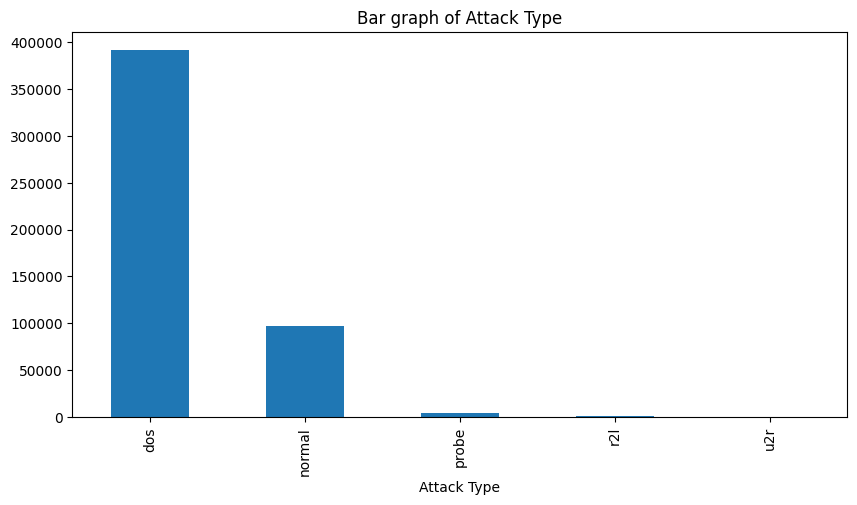

In [18]:
bar_graph('Attack Type', 'attack_type')



In [19]:
# Display the columns of the dataframe
print(df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')


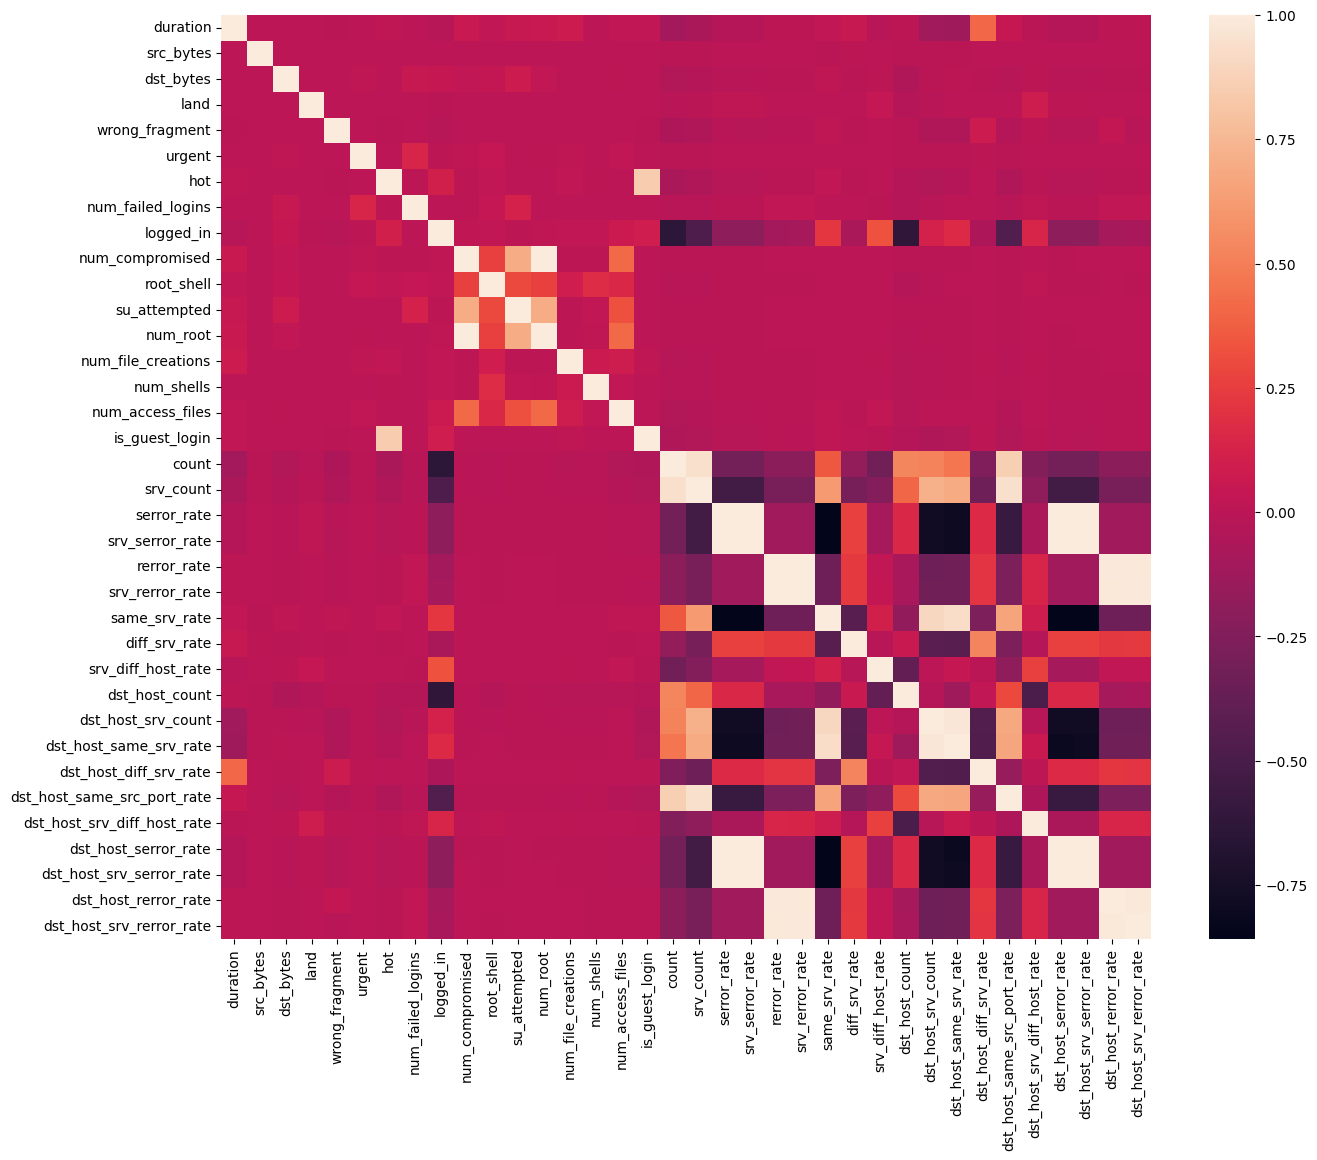

In [23]:
# Display the columns of the dataframe
print(df.columns)

# Drop columns with NaN
df = df.dropna(axis=1)

# Keep columns where there are more than 1 unique values
df = df[[col for col in df if df[col].nunique() > 1]]

# Select only numerical columns for correlation
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
corr = df_numeric.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)
plt.savefig('correlation_heatmap.png')
plt.show()

In [24]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [25]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


# Feature encoding

In [26]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [27]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [28]:
#attack type feature mapping
amap = {'dos':0,'normal':1,'probe':2,'r2l':3,'u2r':4}
df['Attack Type'] = df['Attack Type'].map(amap)

In [29]:
df.drop('service',axis = 1,inplace= True)

# Models

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [31]:
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Concatenate, Add

In [32]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


In [33]:
df.to_csv("ids.csv", index=False)

In [34]:
pd.read_csv("ids.csv")

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,0.0,1.0,0.0,0.00,9,9,0.0,0.11,0.00,1
1,0,1,0,239,486,0,0,0,0,0,...,0.0,1.0,0.0,0.00,19,19,0.0,0.05,0.00,1
2,0,1,0,235,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.00,29,29,0.0,0.03,0.00,1
3,0,1,0,219,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.00,39,39,0.0,0.03,0.00,1
4,0,1,0,217,2032,0,0,0,0,0,...,0.0,1.0,0.0,0.00,49,49,0.0,0.02,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,0,310,1881,0,0,0,0,0,...,0.0,1.0,0.0,0.40,86,255,0.0,0.01,0.05,1
494017,0,1,0,282,2286,0,0,0,0,0,...,0.0,1.0,0.0,0.00,6,255,0.0,0.17,0.05,1
494018,0,1,0,203,1200,0,0,0,0,0,...,0.0,1.0,0.0,0.17,16,255,0.0,0.06,0.05,1
494019,0,1,0,291,1200,0,0,0,0,0,...,0.0,1.0,0.0,0.17,26,255,0.0,0.04,0.05,1


## Artificial Neural Network

1. **Input Layer (Dense Layer)**
    - `Dense(1024, input_dim=30, activation='relu')`
    - **Dense**: This is a fully connected layer with 1024 neurons.
    - **input_dim=30**: This specifies that the input layer expects 30 features (or input variables).
    - **activation='relu'**: The ReLU (Rectified Linear Unit) activation function is applied. ReLU is a popular activation function that introduces non-linearity into the model, allowing it to learn more complex patterns. It outputs 0 for any negative input and the input itself for any positive input.

2. **Dropout Layer**
    - `Dropout(0.40)`
    - **Dropout**: This layer randomly sets 40% of the neurons to zero during each training step. Dropout is a regularization technique used to prevent overfitting by ensuring that the network doesn't rely too much on any individual neuron and instead learns a more robust representation of the data.

3. **Output Layer (Dense Layer)**
    - `Dense(5, activation='sigmoid')`
    - **Dense**: This is another fully connected layer, but with only 5 neurons.
    - **activation='sigmoid'**: The Sigmoid activation function is used, which outputs values between 0 and 1. This is particularly useful for binary or multi-label classification tasks where each output can be interpreted as a probability of belonging to a certain class.

### Architecture Summary

- **Input Layer**: Takes in 30 features and passes them to the first Dense layer.
- **First Dense Layer**: 1024 neurons with ReLU activation function. It introduces non-linearity and allows the model to learn complex patterns.
- **Dropout Layer**: Regularizes the model by randomly turning off 40% of the neurons during training to prevent overfitting.
- **Output Layer**: 5 neurons with Sigmoid activation function. It produces 5 outputs, each representing the probability of a specific class.



In [47]:
ann_model = Sequential([
    Dense(1024, input_dim=30, activation='relu'),
    Dropout(0.40),
    Dense(5, activation='sigmoid')
])

In [48]:
ann_model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [50]:
# Train the model with early stopping
ann_model.fit(X_train, Y_train.values.ravel(), epochs=5, batch_size=32,validation_data=(X_test, Y_test))

Epoch 1/5
10344/10344 [==============================] - 39s 4ms/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.0042 - val_accuracy: 0.9990
Epoch 2/5
10344/10344 [==============================] - 40s 4ms/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 0.0048 - val_accuracy: 0.9988
Epoch 3/5
10344/10344 [==============================] - 54s 5ms/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0043 - val_accuracy: 0.9991
Epoch 4/5
10344/10344 [==============================] - 54s 5ms/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 0.0040 - val_accuracy: 0.9991
Epoch 5/5
10344/10344 [==============================] - 40s 4ms/step - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.0041 - val_accuracy: 0.9990


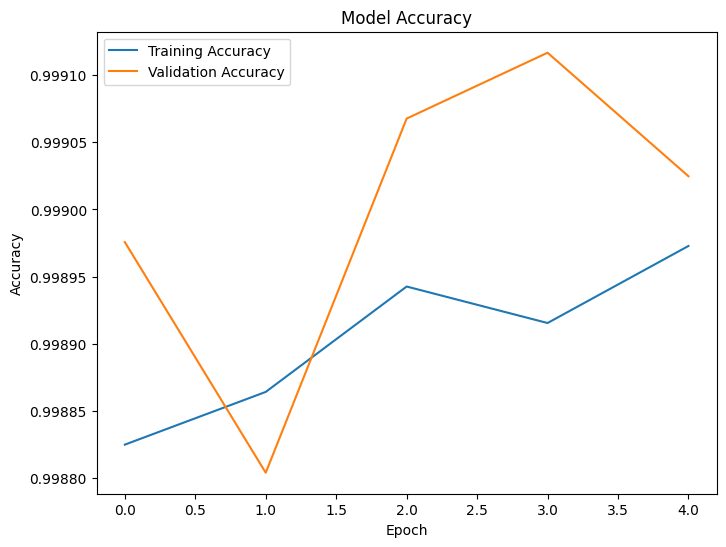

In [52]:
# Get training and validation accuracy and loss values
history = ann_model.history

# Plot the accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('/content/ann_accuracy.png')


plt.show()


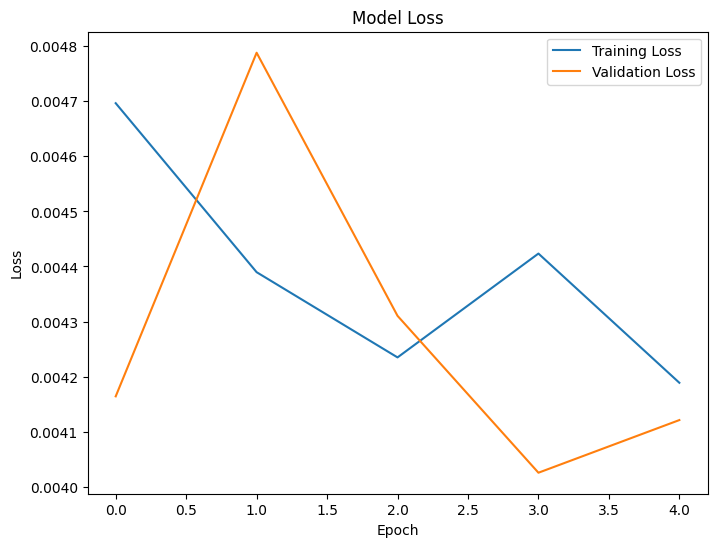

In [53]:

# Plot the loss graph
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/ann_loss.png')

plt.show()

## Deep Neural Network

1. **Input Layer (Dense Layer)**
    - `Dense(1024, input_dim=30, activation='relu')`
    - **Dense**: This is a fully connected layer with 1024 neurons.
    - **input_dim=30**: Indicates that the input layer expects 30 features (input variables).
    - **activation='relu'**: The ReLU (Rectified Linear Unit) activation function is used. ReLU introduces non-linearity and is commonly used in hidden layers of neural networks.

2. **Dropout Layer**
    - `Dropout(0.10)`
    - **Dropout**: Randomly sets 10% of the neurons to zero during each training iteration. Dropout is a regularization technique used to prevent overfitting by reducing the interdependence of neurons.

3. **Hidden Layers (Dense Layers)**
    - `Dense(768, activation='relu')`, `Dense(512, activation='relu')`, `Dense(256, activation='relu')`, `Dense(128, activation='relu')`
    - These layers are fully connected (dense) layers with decreasing numbers of neurons. They gradually reduce the dimensionality of the input representation.
    - Each layer applies the ReLU activation function to introduce non-linearity.

4. **Output Layer (Dense Layer)**
    - `Dense(5, activation='softmax')`
    - **Dense**: This is the final fully connected layer with 5 neurons.
    - **activation='softmax'**: The Softmax activation function is used. Softmax converts raw output scores into probabilities, with each value representing the probability of a particular class. This is commonly used for multi-class classification tasks.

### Architecture Summary

- **Input Layer**: Takes in 30 features and passes them to the first Dense layer.
- **Hidden Layers**: Consist of several densely connected layers, each with ReLU activation, which progressively extract and transform features.
- **Dropout Layers**: Applied after each hidden layer to reduce overfitting.
- **Output Layer**: Produces probabilities for each class using the Softmax activation function, suitable for multi-class classification.



In [54]:
deep_model = Sequential([
    Dense(1024, input_dim=30, activation='relu'),
    Dropout(0.10),
    Dense(768, activation='relu'),
    Dropout(0.10),
    Dense(512, activation='relu'),
    Dropout(0.10),
    Dense(256, activation='relu'),
    Dropout(0.10),
    Dense(128, activation='relu'),
    Dropout(0.10),
    Dense(5, activation='softmax')
])

In [55]:
deep_model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [56]:
deep_model.fit(X_train, Y_train.values.ravel(), epochs=5, batch_size=32,validation_data=(X_test, Y_test))

Epoch 1/5
10344/10344 [==============================] - 75s 7ms/step - loss: 0.0164 - accuracy: 0.9963 - val_loss: 0.0083 - val_accuracy: 0.9979
Epoch 2/5
10344/10344 [==============================] - 54s 5ms/step - loss: 0.0095 - accuracy: 0.9979 - val_loss: 0.0062 - val_accuracy: 0.9984
Epoch 3/5
10344/10344 [==============================] - 55s 5ms/step - loss: 0.0087 - accuracy: 0.9983 - val_loss: 0.0075 - val_accuracy: 0.9982
Epoch 4/5
10344/10344 [==============================] - 55s 5ms/step - loss: 0.0085 - accuracy: 0.9983 - val_loss: 0.0077 - val_accuracy: 0.9986
Epoch 5/5
10344/10344 [==============================] - 55s 5ms/step - loss: 0.0081 - accuracy: 0.9984 - val_loss: 0.0056 - val_accuracy: 0.9989


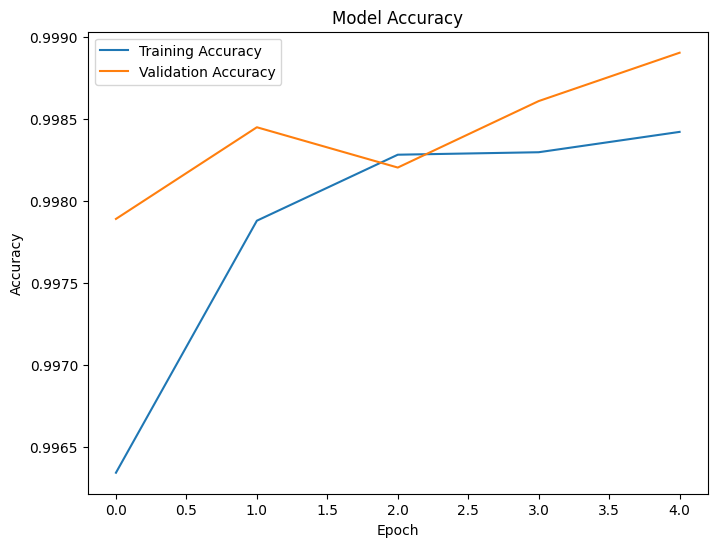

In [57]:
# Get training and validation accuracy and loss values
history = deep_model.history

# Plot the accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('/content/deep_accuracy.png')
plt.show()

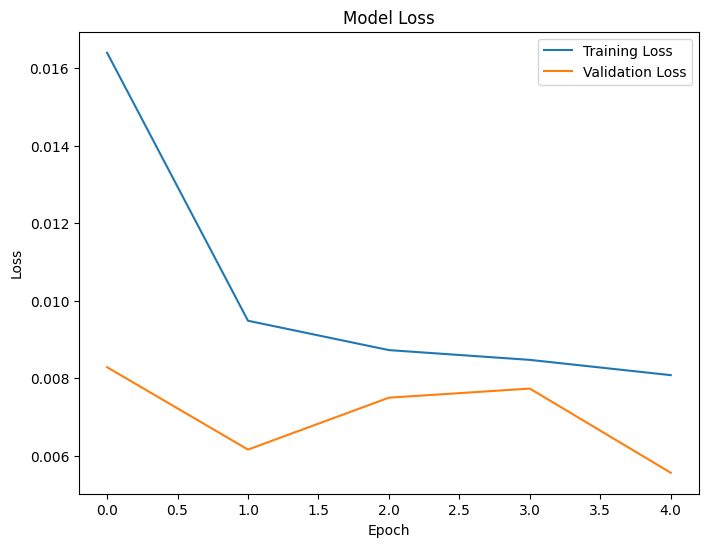

In [58]:

# Plot the loss graph
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/deep_loss.png')

plt.show()

## Convolutional Neural Network

### Architecture

### Input Layer
- **Shape**: `(30, 1)`
- **Explanation**: This specifies that the input data has 30 features and 1 channel (assuming it's a 1D convolution for sequence data).

### Convolutional Layers (Conv1D)
- **Convolutional Layers**: Three convolutional layers are defined.
  - **Convolution**: Each convolutional layer applies a convolution operation with a kernel size of 3 and "same" padding.
  - **Activation**: ReLU activation function is applied to introduce non-linearity.
  - **Pooling**: Each convolutional layer is followed by max-pooling with a pool size of 2.
  - **Dropout**: Dropout with a rate of 0.5 is applied after each convolutional layer to prevent overfitting.

### Flatten Layers
- **Flatten**: After each max-pooling layer, the output is flattened to prepare for the fully connected layers.

### Dense Layers
- **Dense Layers**: Two dense layers are defined.
  - **Dense**: Each dense layer has 256 neurons with ReLU activation.
  - **Dropout**: Dropout with a rate of 0.5 is applied after each dense layer.

### Concatenation
- **Concatenate Layer**: The output of the second dense layer (prior to dropout) is concatenated with the outputs of the two Flatten layers.

### Output Layer
- **Output Layer**: The concatenated output is passed through another dense layer with softmax activation to produce the final output with 5 classes.

### Model Summary
- **Inputs**: A 1D tensor of shape (30, 1).
- **Outputs**: A softmax output layer producing probabilities for each of the 5 classes.
- **Model Type**: This model follows a convolutional neural network architecture followed by dense layers, incorporating dropout regularization and concatenation.



In [59]:

inputs = Input(shape=(30, 1))
y = Conv1D(62, 3, padding="same", activation="relu", input_shape=(30,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y1 = Flatten()(y)

y = Dropout(0.5)(y)
y = Conv1D(62, 3, padding="same", activation="relu", input_shape=(30,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y2 = Flatten()(y)

y = Dropout(0.5)(y)
y = Conv1D(124, 3, padding="same", activation="relu", input_shape=(30,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y = Flatten()(y)
y = Dropout(0.5)(y)
y = Dense(256, activation="relu")(y)
y = Dropout(0.5)(y)
y = Dense(5, activation='softmax')(y)

y = Concatenate()([y, y1, y2])

outputs = Dense(5, activation='softmax')(y)
cnn_model = Model(inputs=inputs, outputs=outputs)

In [60]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [61]:
cnn_model.fit(X_train.reshape((-1,30,1)), Y_train.values.ravel(), epochs=5, batch_size=32,validation_data=(X_test, Y_test))

Epoch 1/5
10344/10344 [==============================] - 70s 6ms/step - loss: 0.0239 - accuracy: 0.9937 - val_loss: 0.0101 - val_accuracy: 0.9973
Epoch 2/5
10344/10344 [==============================] - 63s 6ms/step - loss: 0.0088 - accuracy: 0.9977 - val_loss: 0.0072 - val_accuracy: 0.9981
Epoch 3/5
10344/10344 [==============================] - 59s 6ms/step - loss: 0.0074 - accuracy: 0.9980 - val_loss: 0.0090 - val_accuracy: 0.9973
Epoch 4/5
10344/10344 [==============================] - 59s 6ms/step - loss: 0.0067 - accuracy: 0.9982 - val_loss: 0.0063 - val_accuracy: 0.9983
Epoch 5/5
10344/10344 [==============================] - 61s 6ms/step - loss: 0.0064 - accuracy: 0.9983 - val_loss: 0.0063 - val_accuracy: 0.9984


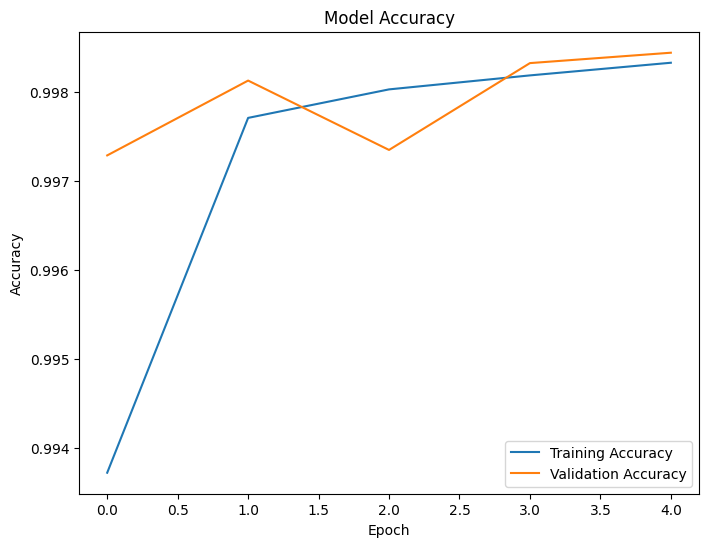

In [62]:
# Get training and validation accuracy and loss values
history = cnn_model.history

# Plot the accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('/content/cnn_accuracy.png')
plt.show()

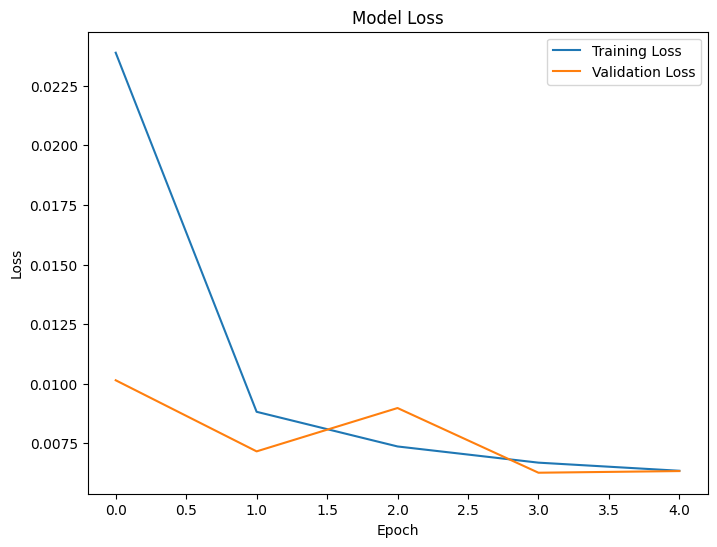

In [63]:

# Plot the loss graph
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/cnn_loss.png')

plt.show()

# Comparision

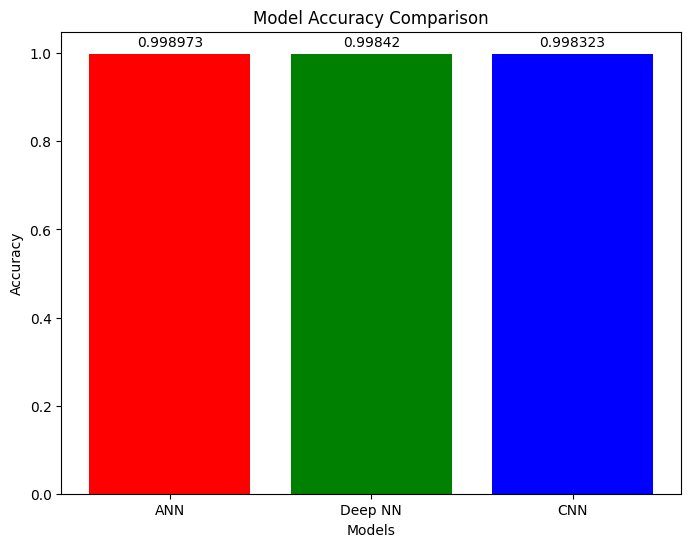

In [67]:
import matplotlib.pyplot as plt

models = ['ANN', 'Deep NN', 'CNN']
accuracies = [
    ann_model.history.history['accuracy'][-1],
    deep_model.history.history['accuracy'][-1],
    cnn_model.history.history['accuracy'][-1]
]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['red', 'green', 'blue'])

# Annotate bars with accuracy scores
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(accuracy, 6), ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Save the plot as a PNG file
plt.savefig('/content/model_comparison.png')

# Show the plot
plt.show()
